In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train_df=pd.read_csv('train.csv')


In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_df.shape

(8523, 12)

In [6]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train_df['Item_Weight'].dtype

dtype('float64')

In [10]:
train_df['Outlet_Size'].dtype


dtype('O')

In [11]:
percentage_null = train_df.isnull().sum()*100/len(train_df)
percentage_null

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
train_df.duplicated().any()       # to check the duplicate row in the dataframe

False

# Handling missing values

In [13]:
item_weight_mean = train_df['Item_Weight'].mean()
item_weight_median = train_df['Item_Weight'].median()

In [14]:
print(item_weight_mean, item_weight_median)

12.857645184135976 12.6


In [15]:
train_df['Item_Weight_mean'] = train_df['Item_Weight'].fillna(item_weight_mean)
train_df['Item_Weight_median'] = train_df['Item_Weight'].fillna(item_weight_median)

In [16]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_median              0
dtype: int64

In [17]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [18]:
print("origional variance : " ,train_df['Item_Weight'].var())
print("variance with mean : " ,train_df['Item_Weight_mean'].var()) 
print("variance with median : ",train_df['Item_Weight_median'].var())

origional variance :  21.561688259836558
variance with mean :  17.86012173506058
variance with median :  17.869561454073647


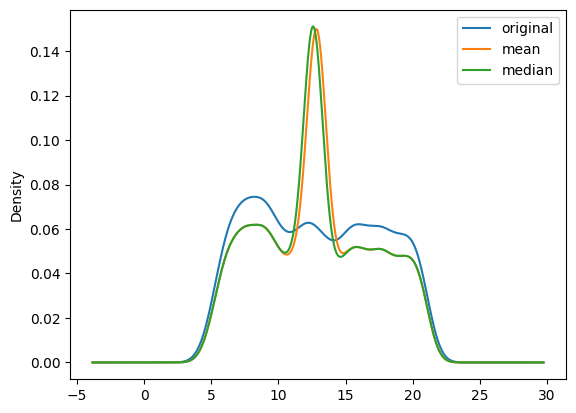

In [19]:
train_df['Item_Weight'].plot(kind='kde',label = "original")
train_df['Item_Weight_mean'].plot(kind='kde', label = "mean")     # kernal density estimation data visualization technique used in statistics and data analysis to represent the probability density of a continuous random variable.
train_df['Item_Weight_median'].plot(kind='kde', label ='median')
plt.legend()
plt.show()


# after applying mean and median imputation, data distribution has been disturbed, more values are cluster around the mean and median.

<Axes: >

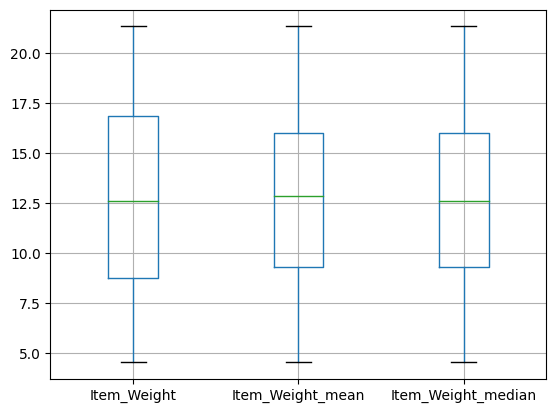

In [20]:
train_df[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

we can see the reduction in spread of the data and the box shrinked which is not desirable, so we need to find ohter medthod to fill the missing values.

In [21]:
# Linear Interpolation: Interpolate method is the way to estimate values fall between two known data points by assuming the linear relationship between the data point.

In [22]:
train_df['interpolated_Item_Weight'] = train_df['Item_Weight'].interpolate(method = 'linear')

In [24]:
train_df['interpolated_Item_Weight'].var()

19.758685821975472

# kernal density estimation data visualization technique used in statistics and data analysis to represent the probability density of a continuous random variable.

<Axes: ylabel='Density'>

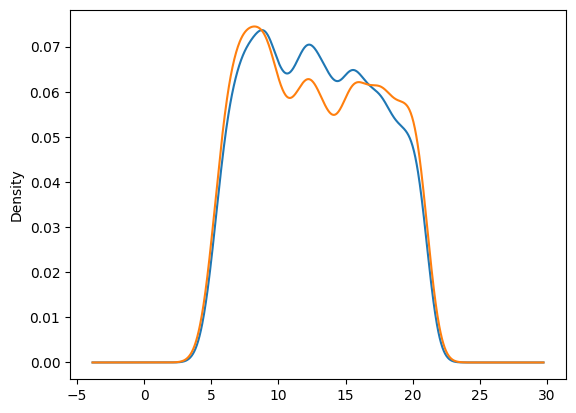

In [25]:
train_df['interpolated_Item_Weight'] .plot ( kind ='kde')
train_df['Item_Weight'] .plot (kind = 'kde')

In [26]:
train_df = train_df.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'], axis =1)

In [27]:
train_df.isnull().sum()


Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
interpolated_Item_Weight        0
dtype: int64

<Axes: >

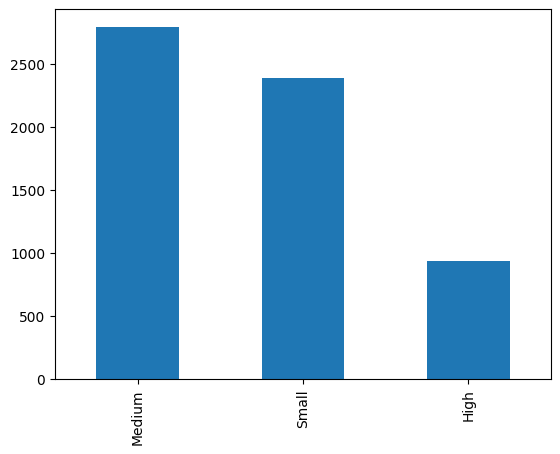

In [28]:
train_df['Outlet_Size'].value_counts().plot(kind= 'bar')

In [ ]:
a = train_df['Outlet_Size'].mode()
print(a)

In [29]:
outlet_mode = train_df['Outlet_Size'].mode()[0]
train_df['Outlet_Size']=train_df['Outlet_Size'].fillna(outlet_mode)
train_df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
interpolated_Item_Weight     0
dtype: int64

In [30]:
train_df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [31]:
train_df['Item_Visibility']=train_df['Item_Visibility'].replace(0,np.nan)

In [32]:
train_df['Item_Visibility'].isnull().sum()

526

In [33]:
train_df['Item_Visibility'] = train_df['Item_Visibility']. interpolate(method='linear')

In [34]:
train_df['Item_Visibility'].isnull().sum()

0

In [35]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [36]:
train_df['Item_Fat_Content']= train_df['Item_Fat_Content'].replace({'LF': 'Low Fat','reg': 'Regular','low fat': 'Low Fat'})

In [37]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92


In [39]:
train_df['Item_Identifier']= train_df['Item_Identifier'].str[0:2] # it extract first two character of the string

<Axes: >

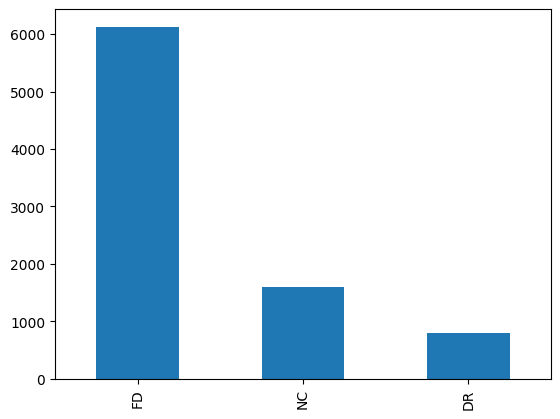

In [40]:
train_df['Item_Identifier'].value_counts().plot(kind = 'bar')

<Axes: >

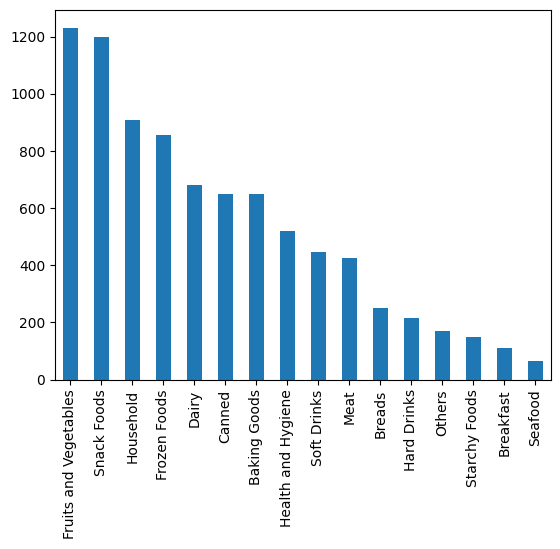

In [41]:
train_df['Item_Type'].value_counts().plot( kind = 'bar')

In [42]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92


In [43]:
train_df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [44]:
# we will convert it inot outlet age

In [45]:
import datetime as dt
current_year = dt.datetime.today().year

In [46]:
train_df['outlet age'] = current_year - train_df['Outlet_Establishment_Year']

In [47]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight,outlet age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,24
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,14


In [48]:
train_df = train_df.drop(columns = 'Outlet_Establishment_Year')

In [49]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight,outlet age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,24
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,14


<Axes: >

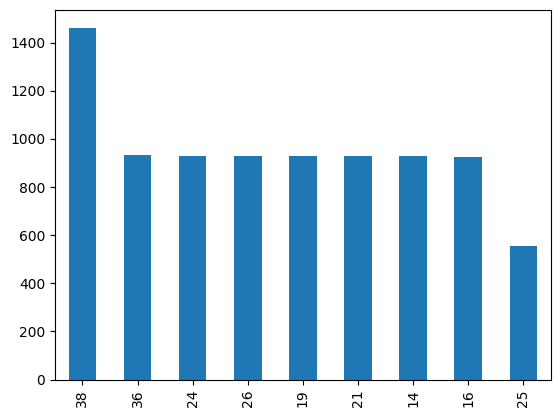

In [50]:
train_df['outlet age'].value_counts() . plot(kind = 'bar')

In [51]:
train_df['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [52]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [53]:
train_df['Outlet_Location_Type']= train_df['Outlet_Location_Type'].str[-1:].astype(int)

In [54]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight,outlet age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,1,Supermarket Type1,3735.1380,9.30,24
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,3,Supermarket Type2,443.4228,5.92,14


In [55]:
num_cols_train = train_df.select_dtypes(include= ['int64', 'float64']).columns

In [56]:
num_cols_train

Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'interpolated_Item_Weight', 'outlet age'],
      dtype='object')

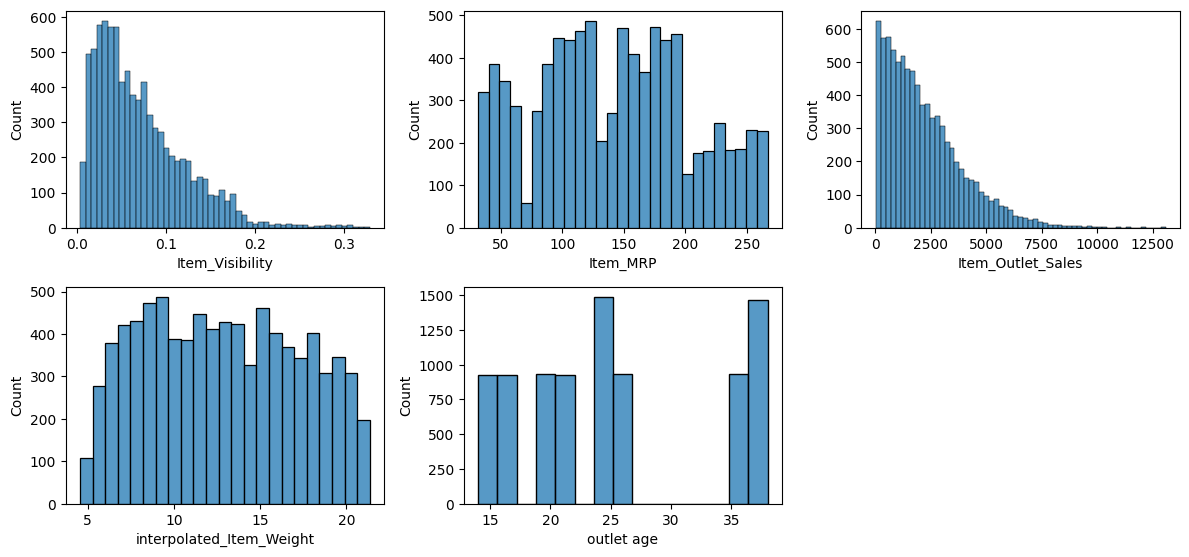

In [57]:
plt.figure(figsize = (12,8))
for i , column in enumerate(num_cols_train):
    plt.subplot(3,3,i+1)
    sns.histplot(train_df[column])
    plt.tight_layout()

In [58]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight,outlet age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,1,Supermarket Type1,3735.1380,9.30,24
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,3,Supermarket Type2,443.4228,5.92,14


In [59]:
train_df['Item_Visibility'].skew() # skewness is used to find the degree of asymetric

1.2370212104832365

In [60]:
for columns in num_cols_train:
    skewness = train_df[columns].skew()
    print(f"skewness of the {columns}  is:", skewness)

skewness of the Item_Visibility  is: 1.2370212104832365
skewness of the Item_MRP  is: 0.1272022683110526
skewness of the Item_Outlet_Sales  is: 1.1775306028542796
skewness of the interpolated_Item_Weight  is: 0.09082707288288835
skewness of the outlet age  is: 0.39664078591553986


Item_Visibility &  Item_Outlet_Sales has skewness > 1. It indicate that the data is right skewed. We have to use IQR method for outlier handling.

In [61]:
train_df['Item_Visibility'].describe()

count    8523.000000
mean        0.070340
std         0.049493
min         0.003575
25%         0.032405
50%         0.058182
75%         0.097094
max         0.328391
Name: Item_Visibility, dtype: float64

C:\Users\Ashish Kumar Singh\AppData\Local\Temp\ipykernel_15516\1195049361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Visibility'])


<Axes: >

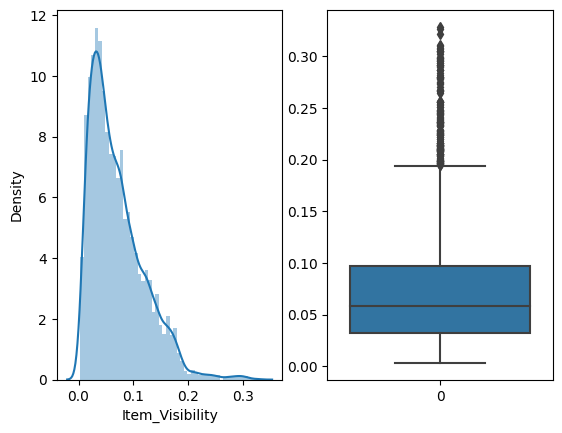

In [62]:
plt.subplot(1,2,1)
sns.distplot(train_df['Item_Visibility'])
plt.subplot(1,2,2)

sns.boxplot(train_df['Item_Visibility'])


In [63]:
# finding IQR

In [64]:
Q1 = train_df['Item_Visibility'].quantile(.25)
Q3 = train_df['Item_Visibility'].quantile(.75)

In [65]:
Q1,Q3

(0.032404555, 0.0970937315)

In [66]:
IQR = Q3- Q1
print(IQR)

0.0646891765


In [67]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [68]:
upper_limit, lower_limit

(0.19412749625, -0.06462920975)

# clipping and capping operations on Item_Visibility column

In [71]:
train_df['Item_Visibility'] = np.where(train_df['Item_Visibility']> upper_limit, upper_limit, np.where(train_df['Item_Visibility']<lower_limit,lower_limit, train_df['Item_Visibility']))

C:\Users\Ashish Kumar Singh\AppData\Local\Temp\ipykernel_15516\1643946456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Visibility'])


<Axes: >

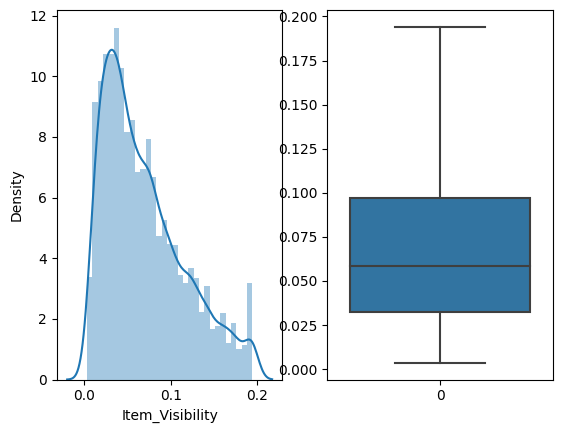

In [72]:
plt.subplot(1,2,1)
sns.distplot(train_df['Item_Visibility'])
plt.subplot(1,2,2)

sns.boxplot(train_df['Item_Visibility'])

# encoding Categorical columns

In [73]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight,outlet age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,1,Supermarket Type1,3735.1380,9.30,24
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,3,Supermarket Type2,443.4228,5.92,14


In [75]:
cat_col_train  =train_df.select_dtypes(include = ['object']).columns

In [76]:
cat_col_train

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
for col in cat_col_train:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])

In [79]:
train_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,interpolated_Item_Weight,outlet age
0,1,0,0.016047,4,249.8092,9,1,1,1,3735.1380,9.30,24
1,0,1,0.019278,14,48.2692,3,1,3,2,443.4228,5.92,14


# define independent and dependent fearures

In [138]:
X = train_df.drop(columns= 'Item_Outlet_Sales')

In [139]:
X

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,interpolated_Item_Weight,outlet age
0,1,0,0.016047,4,249.8092,9,1,1,1,9.300,24
1,0,1,0.019278,14,48.2692,3,1,3,2,5.920,14
2,1,0,0.016760,10,141.6180,9,1,1,1,17.500,24
3,1,1,0.015755,6,182.0950,0,1,3,0,19.200,25
4,2,0,0.014751,9,53.8614,1,0,3,1,8.930,36
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0.056783,13,214.5218,1,0,3,1,6.865,36
8519,1,1,0.046982,0,108.1570,7,1,2,1,8.380,21
8520,2,0,0.035186,8,85.1224,6,2,2,1,10.600,19
8521,1,1,0.145221,13,103.1332,3,1,3,2,7.210,14


In [140]:
y = train_df['Item_Outlet_Sales']

In [141]:
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

# Train Test split

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state =41)

In [144]:
print(X_train.shape, y_test.shape, X_test.shape)

(6818, 11) (1705,) (1705, 11)


In [145]:
X_train

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,interpolated_Item_Weight,outlet age
2215,1,0,0.057303,13,53.3956,6,2,2,1,15.850,19
8258,2,0,0.017108,8,110.3228,3,1,3,2,14.350,14
5006,2,0,0.072128,9,140.5154,7,1,2,1,8.180,21
914,1,1,0.106968,6,142.6786,1,0,3,1,5.460,36
8219,2,0,0.008664,9,119.3756,7,1,2,1,5.030,21
...,...,...,...,...,...,...,...,...,...,...,...
8513,1,1,0.020407,10,99.9042,6,2,2,1,12.000,19
5200,1,0,0.146999,10,103.7648,2,1,2,1,10.300,16
4066,0,0,0.163234,7,144.6444,9,1,1,1,7.850,24
931,1,0,0.040357,6,177.8002,8,2,1,1,12.100,26


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [149]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [179]:
lr=LinearRegression()
lr.fit(X_train, y_train)

svm  = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [184]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [166]:
from sklearn import metrics

In [167]:
metrics.r2_score(y_test,y_pred1)

0.4780301356821708

In [168]:
metrics.r2_score(y_test,y_pred2)

0.03470985657690151

In [185]:
metrics.r2_score(y_test,y_pred4)

0.5765311222933764

In [186]:
mae = metrics.mean_absolute_error(y_test, y_pred4)

In [187]:
mae

797.0690279242641

#  # hyper parameter tunning

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
parameters = {'learning_rate': [0.01,0.02,0.03],
             'subsample':[0.2,0.5,0.9],'n_estimators':[100,500,1000],'max_depth':[4,5,6]}

In [192]:
grid = GridSearchCV(estimator = gr , param_grid = parameters , cv= 5, n_jobs=-1 )

In [193]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.2, 0.5, 0.9]})

In [195]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.9)

In [196]:
grid.best_score_

0.6019109803609343